<a href="https://colab.research.google.com/github/lamyse1/deep-learning-/blob/main/Final%20Project/DL_Final_Project_Diabetes_LamyseAmmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

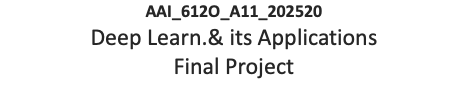

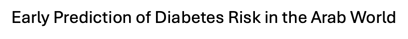

In [14]:
#Install required Libraries
!pip install tensorflow pandas scikit-learn numpy matplotlib


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


## Load and Preprocess the dataset

In [16]:

# Load the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Check dataset structure
print(df.head())

# Split dataset into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
# Reshape input data for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


## Define and Train the LTSM Model

In [18]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.5751 - loss: 0.6887 - val_accuracy: 0.7403 - val_loss: 0.6673
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7501 - loss: 0.6542 - val_accuracy: 0.7338 - val_loss: 0.6041
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7557 - loss: 0.5700 - val_accuracy: 0.7273 - val_loss: 0.5169
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7562 - loss: 0.5046 - val_accuracy: 0.7532 - val_loss: 0.5006
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7610 - loss: 0.4639 - val_accuracy: 0.7468 - val_loss: 0.5028
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7657 - loss: 0.4648 - val_accuracy: 0.7532 - val_loss: 0.5042
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7363 - loss: 0.5104 - val_accuracy: 0.7532 - val_loss: 0.5037
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7875 - loss: 0.4482 - val_accuracy: 0.7597 - val_loss: 0

## Evalauate The Model Performance

In [19]:
# Predictions on test data
y_pred_prob = lstm_model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate model using healthcare metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display results
evaluation_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"],
    "Value": [accuracy, precision, recall, f1, roc_auc]
})

print(evaluation_metrics)


1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
      Metric     Value
0   Accuracy  0.753247
1  Precision  0.649123
2     Recall  0.672727
3   F1-score  0.660714
4    AUC-ROC  0.809734


## Plot Training and Validation Accuracy

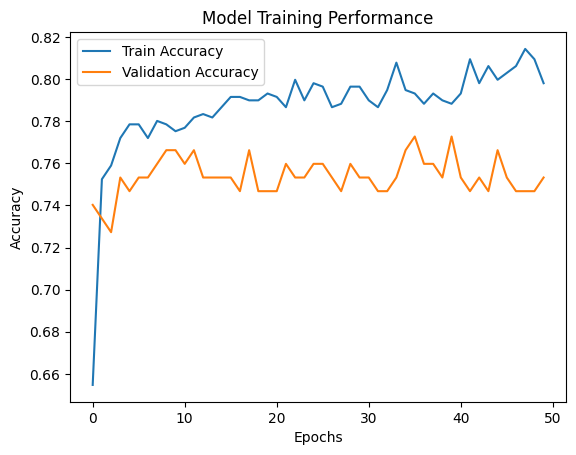

In [20]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Performance')
plt.show()


## Fine Tune the LTSM Model for better metrics

In [25]:
# Fine-Tuned LSTM Model
lstm_tuned = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.3),  # Increased dropout
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with lower learning rate
lstm_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                   loss='binary_crossentropy', metrics=['accuracy'])

# Train fine-tuned model
history_tuned = lstm_tuned.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5004 - loss: 0.6920 - val_accuracy: 0.6494 - val_loss: 0.6826
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6699 - loss: 0.6775 - val_accuracy: 0.6753 - val_loss: 0.6645
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7183 - loss: 0.6524 - val_accuracy: 0.7273 - val_loss: 0.6349
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7261 - loss: 0.6206 - val_accuracy: 0.7208 - val_loss: 0.5891
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7610 - loss: 0.5592 - val_accuracy: 0.7208 - val_loss: 0.5426
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7320 - loss: 0.5233 - val_accuracy: 0.7273 - val_loss: 0.5218
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7430 - loss: 0.4911 - val_accuracy: 0.7208 - val_loss: 0.5128
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7743 - loss: 0.4528 - val_accuracy: 0.7273 - val_loss: 0.5106


### Implement Risk Stratification


Instead of only predicting Diabetes (Yes/No), I classified patients into Low, Medium, and High-Risk groups.

In [21]:
# Define risk categories based on glucose levels
def categorize_risk(glucose):
    if glucose < 110:
        return "Low-Risk"
    elif 110 <= glucose < 140:
        return "Medium-Risk"
    else:
        return "High-Risk"

# Add a new column for risk levels
df['Risk Category'] = df['Glucose'].apply(categorize_risk)

# Show distribution of risk categories
print(df['Risk Category'].value_counts())


Risk Category
Low-Risk       314
Medium-Risk    257
High-Risk      197
Name: count, dtype: int64


### Transformer Model for Feature Extraction

In [22]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

In [26]:
# Transformer Model
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + attn_output)  # Normalize before FFN
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + ffn_output)

# Define input shape
input_shape = (X_train.shape[1], 1)
inputs = tf.keras.Input(shape=input_shape)

# Apply Transformer Block
transformer_block = TransformerBlock(embed_dim=64, num_heads=4, ff_dim=128)
x = transformer_block(inputs)

# Flatten and pass through Dense layers
x = tf.keras.layers.Flatten()(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)


In [27]:
# Define the model
transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
transformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                          loss="binary_crossentropy", metrics=["accuracy"])

# Reshape data for Transformer input
X_train_trans = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_trans = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train Transformer Model
history_trans = transformer_model.fit(X_train_trans, y_train, epochs=50, batch_size=32, validation_data=(X_test_trans, y_test))


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6749 - loss: 0.6929 - val_accuracy: 0.6429 - val_loss: 0.6924
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6511 - loss: 0.6921 - val_accuracy: 0.6429 - val_loss: 0.6916
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6343 - loss: 0.6915 - val_accuracy: 0.6429 - val_loss: 0.6909
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6515 - loss: 0.6906 - val_accuracy: 0.6429 - val_loss: 0.6902
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6493 - loss: 0.6899 - val_accuracy: 0.6429 - val_loss: 0.6895
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6455 - loss: 0.6893 - val_accuracy: 0.6429 - val_loss: 0.6888
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6578 - loss: 0.6882 - val_accuracy: 0.6429 - val_loss: 0.6881
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6441 - loss: 0.6879 - val_accuracy: 0.6429 - v